In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/celsogonzalezlopez/Desktop/ecom')

In [5]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [6]:
# Cleaning the dataset
dont_need = [0,1,2]
df.drop(df.columns[dont_need], axis=1, inplace=True)

In [7]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
# Quick EDA
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

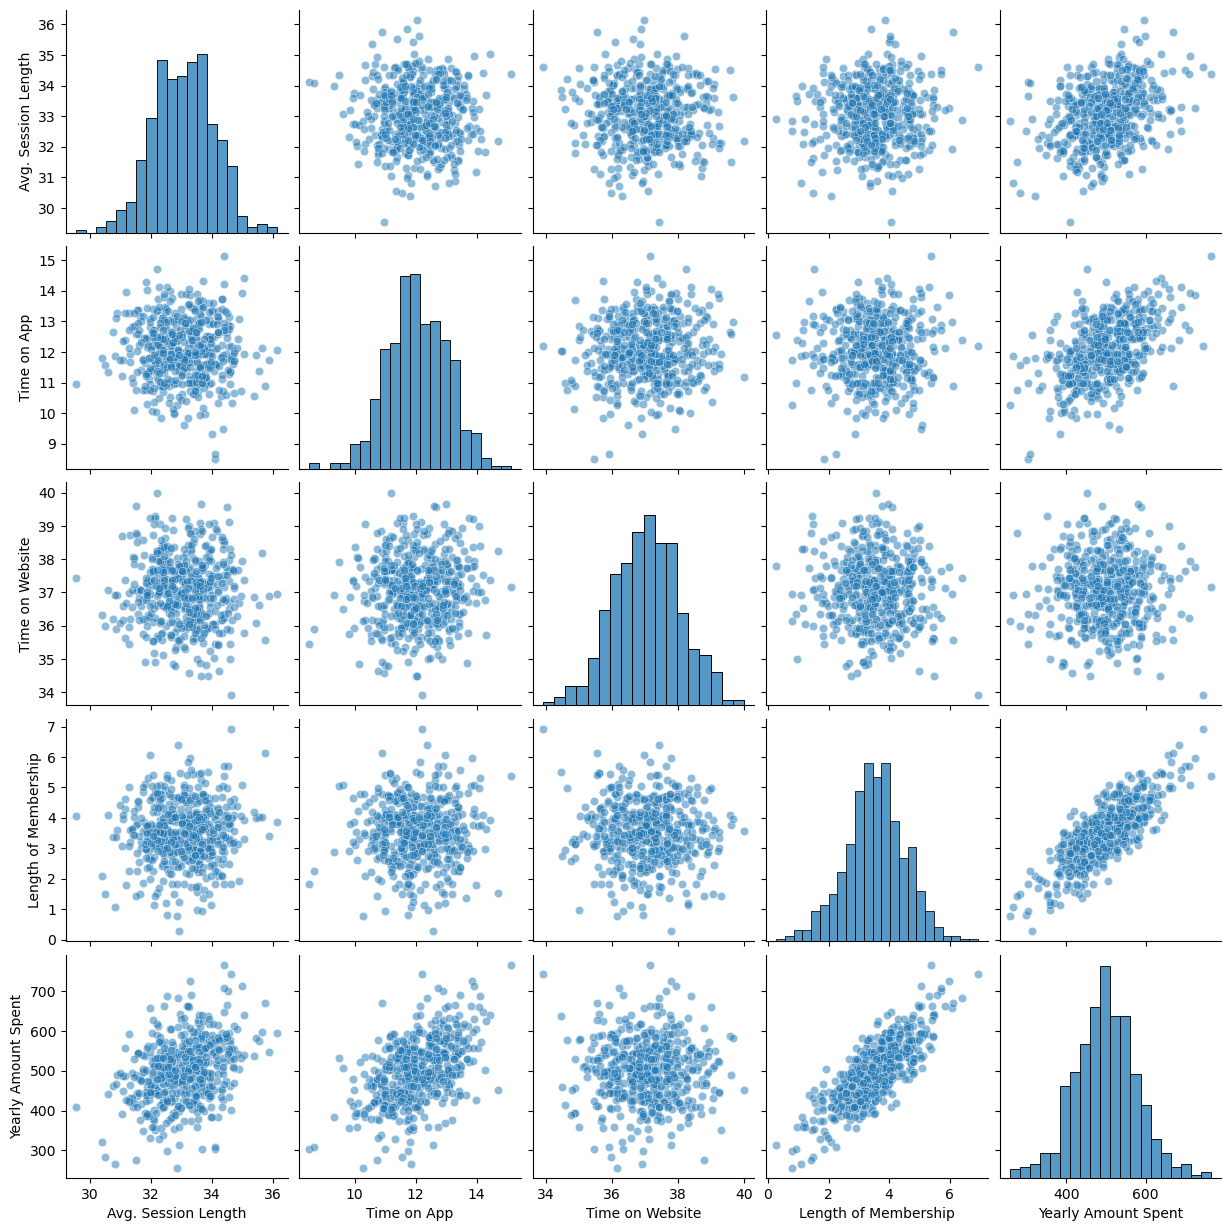

In [15]:
# Visualize correlation between variables
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.5})

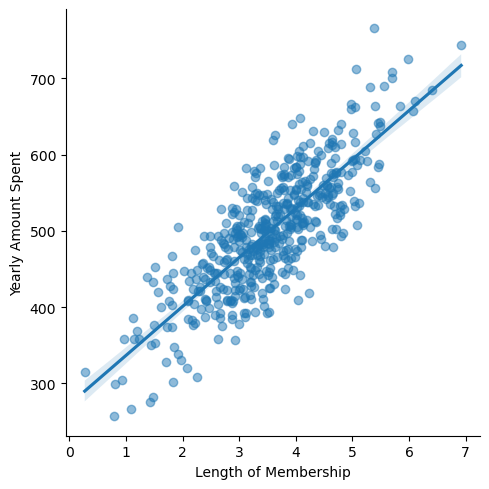

In [16]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df, scatter_kws={'alpha':0.5})

## Training the model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [21]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
313,33.384111,12.677401,35.622531,3.680847
294,33.770900,11.153966,37.240330,4.729485
100,32.498393,13.410759,35.990489,3.184619
273,33.551699,12.158585,36.575134,5.453969
383,34.188184,13.130022,35.429334,3.790552
...,...,...,...,...
230,32.351478,13.105159,35.574842,3.641497
16,32.125387,11.733862,34.894093,3.136133
74,33.879745,13.587806,38.260353,3.258113
176,32.332637,11.548761,38.576516,4.773503


## Fitting the model

In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
predictions = lm.predict(X_test)

In [37]:
predictions

array([594.77151756, 325.42447931, 488.39520096, 599.14562647,
       558.73526274, 559.05562486, 508.87086763, 573.32166783,
       450.04618363, 589.77110136, 395.26360514, 535.16043945,
       577.35360586, 644.44166452, 417.07798439, 557.65116559,
       497.19237094, 481.92023746, 572.53900355, 518.95725122,
       544.212386  , 487.83683119, 538.67681281, 543.66384113,
       559.4719923 , 578.26814458, 497.2225841 , 524.12855258,
       479.9519835 , 564.48281539, 397.08551295, 432.11904181,
       506.96784314, 487.99856019, 643.36177126, 502.7691438 ,
       554.68295143, 549.19539691, 384.35283575, 313.23374861,
       548.58073819, 448.19753061, 485.22196304, 422.11591575,
       465.93054759, 766.84779205, 524.06718516, 482.41584958,
       484.39096032, 635.4221462 , 588.62940798, 428.62102876,
       478.93753959, 611.09728863, 444.82837076, 599.38002294,
       404.52063592, 313.58459684, 495.6340856 , 427.80383295,
       505.74290037, 452.85779013, 535.36623991, 485.99

Text(0, 0.5, 'Actual Values')

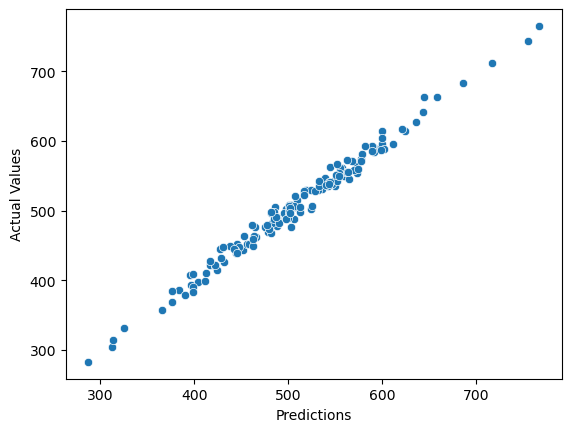

In [39]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')

In [41]:
# Testing the accuracy of the prediction model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))

Mean Absolute Error:  7.541608060513345
Mean Squared Error:  86.53101610979053


In [43]:
residuals = y_test - predictions

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


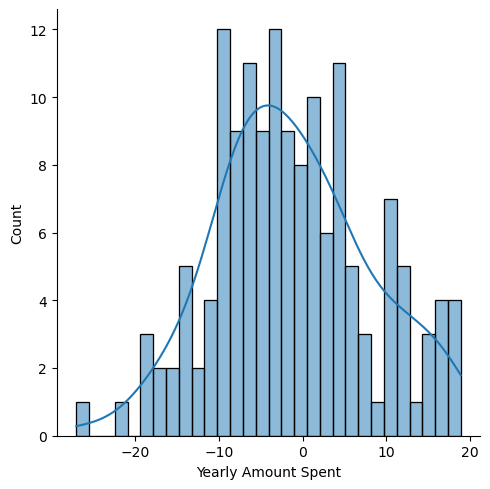

In [45]:
# Plotting the residuals to see if its normally distributed
sns.displot(residuals, bins=30, kde=True)

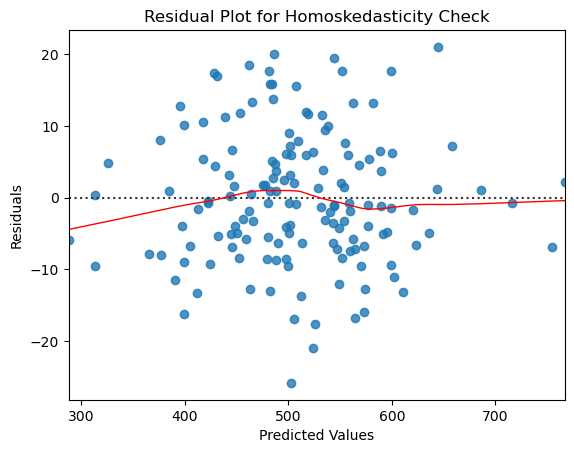

In [51]:
# Residual Plot to check for homoskedasticity
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoskedasticity Check')
plt.show()

In [53]:
# Summarizing the time spent on website to do hypothesis testing
print(df['Time on Website'].describe())

count    500.000000
mean      37.060445
std        1.010489
min       33.913847
25%       36.349257
50%       37.069367
75%       37.716432
max       40.005182
Name: Time on Website, dtype: float64


## Hypothesis Testing

Null Hypothesis (H₀): There is no significant difference in the mean yearly spend between the two groups (high time on website vs. low time on website).

Alternative Hypothesis (H₁): There is a significant difference in the mean yearly spend between the two groups.

In [56]:
from scipy.stats import ttest_ind

# Using Q1 and Q3 as the low and high thresholds for low time users and high time users on the website
low_threshold = 36.349257
high_threshold = 37.716432

# Getting the average yearly spend for each type of user
low_time_avg_spend = df.loc[df['Time on Website'] < low_threshold, 'Yearly Amount Spent'].mean()
high_time_avg_spend = df.loc[df['Time on Website'] >= high_threshold, 'Yearly Amount Spent'].mean()

print("Avg Yearly Spend for Users based on Low/High Time Spent on Website")
print(f"Low Group: ${low_time_avg_spend:.2f}")
print(f"High Group: ${high_time_avg_spend:.2f}")

# T test
t_stat, p_value = ttest_ind(df.loc[df['Time on Website'] < low_threshold, 'Yearly Amount Spent'],
                            df.loc[df['Time on Website'] >= high_threshold, 'Yearly Amount Spent'])

print(f"\nT-stat: {t_stat}")
print(f"P-value: {p_value}")

Avg Yearly Spend for Users based on Low/High Time Spent on Website
Low Group: $498.89
High Group: $500.82

T-stat: -0.1839359604582617
P-value: 0.8542139986266206


## Fail to reject the null hypothesis

P-value is above 0.05. There is not enough evidence to conclude that there is a significant difference or effect between users who spend a low amount of time on the website vs. a high amount of time on the website

## Checking assumptions for T-test

In [60]:
from scipy.stats import shapiro, levene

low_time_spent = df.loc[df['Time on Website'] < low_threshold, 'Yearly Amount Spent']
high_time_spent = df.loc[df['Time on Website'] >= high_threshold, 'Yearly Amount Spent']

# Shapiro-Wilk test for normality
statistic_low, p_value_low = shapiro(low_time_spent)
statistic_high, p_value_high = shapiro(high_time_spent)

print(f"Shapiro-Wilk Test for Normality:")
print(f"Low Time Spent Group --> Stat: {statistic_low:.4f}, P-value: {p_value_low:.4f}")
print(f"High Time Spent Group --> Stat: {statistic_high:.4f}, P-value: {p_value_high:.4f}")

# Levene's test for homogeneity of variances
statistic, p_value = levene(low_time_spent, high_time_spent)

print(f"\nLevene's Test for Homogeneity of Variances:")
print(f"Statistic: {statistic:.4f}, P-value: {p_value:.4f}")

Shapiro-Wilk Test for Normality:
Low Time Spent Group --> Stat: 0.9923, P-value: 0.7267
High Time Spent Group --> Stat: 0.9951, P-value: 0.9447

Levene's Test for Homogeneity of Variances:
Statistic: 0.2470, P-value: 0.6196


## High p-values for both tests are good, indicates assumptions are true